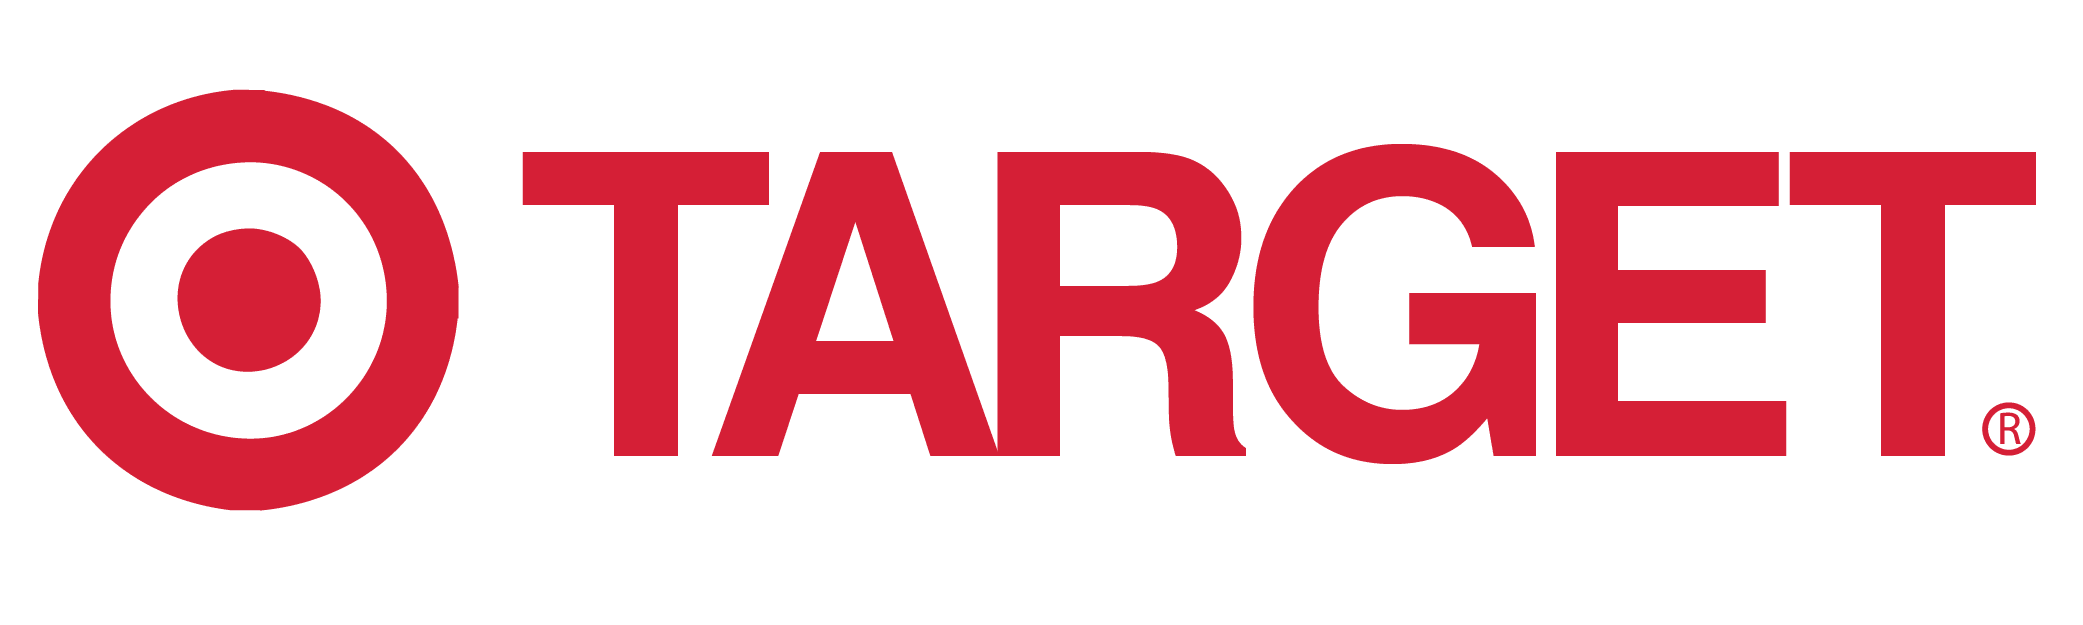

### **Importing needed Libraries**

In [ ]:
from sqlalchemy import create_engine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sqlite3
import warnings
warnings.filterwarnings('ignore')

### **Import data from Google Drive**

In [ ]:
c
geolocation = pd.read_csv("/content/drive/MyDrive/Datasets/Target/geolocation.csv")
order_items = pd.read_csv("/content/drive/MyDrive/Datasets/Target/order_items.csv")
order_reviews = pd.read_excel("/content/drive/MyDrive/Datasets/Target/order_reviews.xlsx")
orders = pd.read_csv("/content/drive/MyDrive/Datasets/Target/orders.csv")
payments = pd.read_csv("/content/drive/MyDrive/Datasets/Target/payments.csv")
products = pd.read_csv("/content/drive/MyDrive/Datasets/Target/products.csv")
sellers = pd.read_csv("/content/drive/MyDrive/Datasets/Target/sellers.csv")

Mounted at /content/drive


### **Database Creation, Connecting & Writing SQL Query**

In [ ]:
# Creating Target Database
engine = create_engine("sqlite:///target.db")

# Creating Table for each dataset
def load_dataframe(df,table_name,engine):
    df.to_sql(table_name,con=engine,if_exists='replace',index=False)

load_dataframe(customers,'customers_',engine)
load_dataframe(geolocation,'geolocation',engine)
load_dataframe(order_items,'order_items',engine)
load_dataframe(order_reviews,'order_reviews',engine)
load_dataframe(orders,'orders',engine)
load_dataframe(payments,'payments',engine)
load_dataframe(products,'products',engine)
load_dataframe(sellers,'sellers',engine)

# Connecting with Target Database
connect = sqlite3.connect('target.db')

In [ ]:
# Getting list of All tables in Database
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master where type = 'table'",connect
)
tables

,name
0,customers_
1,geolocation
2,order_items
3,order_reviews
4,orders
5,payments
6,products
7,sellers


### **Basic Exploratory Data Analysis**

**Overview of Data & Unique & Null Value Check**

In [ ]:
# Customers_ tables
null_cust = '''SELECT
    SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) as null_customer_id,
    SUM(CASE WHEN customer_unique_id IS NULL THEN 1 ELSE 0 END) as null_customer_unique_id,
    SUM(CASE WHEN customer_zip_code_prefix IS NULL THEN 1 ELSE 0 END) as null_customer_zip_code_prefix,
    SUM(CASE WHEN customer_city IS NULL THEN 1 ELSE 0 END) as null_customer_city,
    SUM(CASE WHEN customer_state IS NULL THEN 1 ELSE 0 END) as null_customer_state
FROM customers_;'''

unique_c = '''
  SELECT
  COUNT(DISTINCT(customer_id)) AS Unique_Customer_ids,
  COUNT(DISTINCT(customer_unique_id)) AS Unique_Customers,
  COUNT(DISTINCT(customer_city))  AS  No_of_Cities,
  COUNT(DISTINCT(customer_state)) AS States_Count
  FROM customers_'''
display(pd.read_sql_query('''SELECT * FROM customers_''',connect))
display(pd.read_sql_query(unique_c,connect))
display(pd.read_sql_query(null_cust,connect))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


,Unique_Customer_ids,Unique_Customers,No_of_Cities,States_Count
0,99441,96096,4119,27


,null_customer_id,null_customer_unique_id,null_customer_zip_code_prefix,null_customer_city,null_customer_state
0,0,0,0,0,0


In [ ]:
# Geolocation Table
display(pd.read_sql_query('''SELECT * FROM geolocation''',connect))
unique_loc = ''' SELECT
  COUNT(DISTINCT(geolocation_zip_code_prefix)) AS Unique_Zip_Codes,
  COUNT(DISTINCT(geolocation_city)) AS Unique_Cities,
  COUNT(DISTINCT(geolocation_state)) AS Unique_States
FROM geolocation
'''
null_value_geo = '''SELECT
  SUM(CASE WHEN geolocation_zip_code_prefix IS NULL THEN 1 ELSE 0 END) as null_geolocation_zip_code_prefix,
  SUM(CASE WHEN geolocation_lat IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lat,
  SUM(CASE WHEN geolocation_lng IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lng,
  SUM(CASE WHEN geolocation_city IS NULL THEN 1 ELSE 0 END) AS null_geolocation_city,
  SUM(CASE WHEN geolocation_state IS NULL THEN 1 ELSE 0 END) AS null_geolocation_state
FROM geolocation
'''
display(pd.read_sql_query(unique_loc,connect))
display(pd.read_sql_query(null_value_geo,connect))

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


,Unique_Zip_Codes,Unique_Cities,Unique_States
0,19015,8011,27


,null_geolocation_zip_code_prefix,null_geolocation_lat,null_geolocation_lng,null_geolocation_city,null_geolocation_state
0,0,0,0,0,0


In [ ]:
# Order items Table
unique_values = '''
SELECT
  COUNT(DISTINCT(order_id)) AS Unique_Order_Ids,
  COUNT(DISTINCT(order_item_id)) AS Unique_Order_Item_Ids
FROM order_items
'''
null_ = '''SELECT
        SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) as order_id,
        SUM(CASE WHEN order_item_id IS NULL THEN 1 ELSE 0 END) as order_item_id,
        SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) as product_id,
        SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) as seller_id,
        SUM(CASE WHEN shipping_limit_date IS NULL THEN 1 ELSE 0 END) as shipping_limit_date,
        SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) as price,
        SUM(CASE WHEN freight_value IS NULL THEN 1 ELSE 0 END) as freight_value
FROM order_items'''
display(pd.read_sql_query('''SELECT * FROM order_items''',connect))
print("--Count of Null Values--")
display(pd.read_sql_query(null_,connect))
print("--Count of Unique Values--")
display(pd.read_sql_query(unique_values,connect))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


--Count of Null Values--


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,0,0,0,0,0,0


--Count of Unique Values--


,Unique_Order_Ids,Unique_Order_Item_Ids
0,98666,21


In [ ]:
# Order reviews Table
unique_val = '''
SELECT
  COUNT(DISTINCT(review_id)) AS Unique_Review,
  COUNT(DISTINCT(order_id)) AS Unique_order_id,
  COUNT(DISTINCT(review_score)) AS Unique_review_score,
  COUNT(DISTINCT(review_comment_title)) AS Unique_review_comment_title
FROM order_reviews
'''
null_ = '''
SELECT
  SUM(CASE WHEN review_id IS NULL THEN 1 ELSE 0 END) as review_id,
  SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) as order_id,
  SUM(CASE WHEN review_score IS NULL THEN 1 ELSE 0 END) as review_score,
  SUM(CASE WHEN review_comment_title IS NULL THEN 1 ELSE 0 END) as review_comment_title,
  SUM(CASE WHEN review_creation_date IS NULL THEN 1 ELSE 0 END) AS review_creation_date,
  SUM(CASE WHEN review_answer_timestamp IS NULL THEN 1 ELSE 0 END) AS review_answer_timestamp
FROM order_reviews
'''
display(pd.read_sql_query('''SELECT * FROM order_reviews''',connect))
print("--Count of Unique Values--")
display(pd.read_sql_query(unique_val,connect))
print("--Count of Null Values--")
display(pd.read_sql_query(null_,connect))

,review_id,order_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,18/01/18 0:00,18/01/18 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,2018-10-03 00:00:00,2018-11-03 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,17/02/18 0:00,18/02/18 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,21/04/17 0:00,21/04/17 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,2018-01-03 00:00:00,2018-02-03 10:26:00
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,2018-07-07 00:00:00,14/07/18 17:18
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,2017-09-12 00:00:00,2017-11-12 20:06:00
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,22/03/18 0:00,23/03/18 9:10
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,2018-01-07 00:00:00,2018-02-07 12:59:00


--Count of Unique Values--


,Unique_Review,Unique_order_id,Unique_review_score,Unique_review_comment_title
0,98410,98673,5,3319


--Count of Null Values--


,review_id,order_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp
0,0,0,0,87677,0,0


In [ ]:
# Orders Table
display(pd.read_sql_query('''SELECT * FROM orders''',connect))
uniques = '''
SELECT
COUNT(DISTINCT order_id) AS Unique_Order,
COUNT(DISTINCT customer_id) AS Unique_Customer,
COUNT(DISTINCT order_status) AS Unique_Status
FROM orders
'''
null = '''
SELECT
SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS order_id,
SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS customer_id,
SUM(CASE WHEN order_status IS NULL THEN 1 ELSE 0 END) AS order_status,
SUM(CASE WHEN order_purchase_timestamp IS NULL THEN 1 ELSE 0 END) AS order_purchase_timestamp,
SUM(CASE WHEN order_approved_at IS NULL THEN 1 ELSE 0 END) AS order_approved_at,
SUM(CASE WHEN order_delivered_carrier_date IS NULL THEN 1 ELSE 0 END) AS order_delivered_carrier_date,
SUM(CASE WHEN order_delivered_customer_date IS NULL THEN 1 ELSE 0 END) AS order_delivered_customer_date,
SUM(CASE WHEN order_estimated_delivery_date IS NULL THEN 1 ELSE 0 END) AS order_estimated_delivery_date
FROM orders
'''
display(pd.read_sql_query(uniques,connect))
display(pd.read_sql_query(null,connect))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


,Unique_Order,Unique_Customer,Unique_Status
0,99441,99441,8


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,0,0,0,160,1783,2965,0


In [ ]:
# Payments Table
display(pd.read_sql_query('''SELECT * FROM payments''',connect))
uni = '''
SELECT
COUNT(DISTINCT order_id) AS Unique_Order,
COUNT(DISTINCT payment_sequential) AS Unique_Payment_Sequential,
COUNT(DISTINCT payment_type) AS Unique_Payment_Type,
COUNT(DISTINCT payment_installments) AS Unique_Payment_Installments
FROM payments
'''
null = '''
SELECT
SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS order_id,
SUM(CASE WHEN payment_sequential IS NULL THEN 1 ELSE 0 END) AS payment_sequential,
SUM(CASE WHEN payment_type IS NULL THEN 1 ELSE 0 END) AS payment_type,
SUM(CASE WHEN payment_installments IS NULL THEN 1 ELSE 0 END) AS payment_installments,
SUM(CASE WHEN payment_value IS NULL THEN 1 ELSE 0 END) AS payment_value
FROM payments
'''
print("-- Count of Unique Values---")
display(pd.read_sql_query(uni,connect))
print("-- Count of Null Values---")
display(pd.read_sql_query(null,connect))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


-- Count of Unique Values---


,Unique_Order,Unique_Payment_Sequential,Unique_Payment_Type,Unique_Payment_Installments
0,99440,29,5,24


-- Count of Null Values---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,0,0,0,0


In [ ]:
# Products
display(pd.read_sql_query('''SELECT * FROM products''',connect))
unique_prod = '''
SELECT
COUNT(DISTINCT product_id) AS unique_product_ids,
COUNT(DISTINCT product_category) AS unique_product_category
FROM products
'''
null = '''
SELECT
SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS product_id,
SUM(CASE WHEN product_category IS NULL THEN 1 ELSE 0 END) AS product_category,
SUM(CASE WHEN product_name_length	 IS NULL THEN 1 ELSE 0 END) AS product_name_length,
SUM(CASE WHEN product_description_length IS NULL THEN 1 ELSE 0 END) AS product_description,
SUM(CASE WHEN product_photos_qty IS NULL THEN 1 ELSE 0 END) AS product_photos_qty,
SUM(CASE WHEN product_weight_g IS NULL THEN 1 ELSE 0 END) AS product_weight_g,
SUM(CASE WHEN product_length_cm IS NULL THEN 1 ELSE 0 END) AS product_length_cm,
SUM(CASE WHEN product_height_cm IS NULL THEN 1 ELSE 0 END) AS product_height_cm,
SUM(CASE WHEN product_width_cm IS NULL THEN 1 ELSE 0 END) AS product_width_cm
FROM products
'''
print("--- Count of Unique Values ---")
display(pd.read_sql_query(unique_prod,connect))
print("--- Count of Null Values ---")
display(pd.read_sql_query(null,connect))

,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


--- Count of Unique Values ---


,unique_product_ids,unique_product_category
0,32951,73


--- Count of Null Values ---


,product_id,product_category,product_name_length,product_description,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,610,610,610,610,2,2,2,2


In [ ]:
# Sellers Table
display(pd.read_sql_query('''SELECT * FROM sellers''',connect))
unique_seller = '''
SELECT
COUNT(DISTINCT seller_id) AS unique_seller_ids,
COUNT(DISTINCT seller_zip_code_prefix) AS unique_seller_zip_code_prefix,
COUNT(DISTINCT seller_city) AS unique_seller_city,
COUNT(DISTINCT seller_state) AS unique_seller_state
FROM sellers
'''
null_val = '''
SELECT
SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS seller_id,
SUM(CASE WHEN seller_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS seller_zip_code_prefix,
SUM(CASE WHEN seller_city IS NULL THEN 1 ELSE 0 END) AS seller_city,
SUM(CASE WHEN seller_state IS NULL THEN 1 ELSE 0 END) AS seller_state
FROM sellers
'''
print("--- Count of Unique Values ---")
display(pd.read_sql_query(unique_seller,connect))
print("--- Count of Null Values ---")
display(pd.read_sql_query(null_val,connect))

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


--- Count of Unique Values ---


,unique_seller_ids,unique_seller_zip_code_prefix,unique_seller_city,unique_seller_state
0,3095,2246,611,23


--- Count of Null Values ---


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,0,0,0


### **Get the time period for which the data is given.**

In [ ]:
time_period = '''SELECT
    MIN(order_purchase_timestamp) as Start_date,
    MAX(order_purchase_timestamp) as End_date
FROM orders'''
pd.read_sql_query(time_period,connect)

,Start_date,End_date
0,2016-09-04 21:15:19,2018-10-17 17:30:18


**We have Data from September of 2016 to November of 2018, total 26 months of data.**
****

### **No. of States & Cities present in data.**

In [ ]:
cities_and_status = ''' SELECT
  COUNT(DISTINCT(geolocation_city)) as Cities,
  COUNT(DISTINCT(geolocation_state)) as States
  FROM geolocation
'''
pd.read_sql_query(cities_and_status,connect)

,Cities,States
0,8011,27


**Total we have customers from 8011 cities & 27 States.**
****

### **Is there is any growing trend in E-commerce in Brazil? How can we describe a complete scenario?**


In [ ]:
trends = '''
WITH trends AS (
SELECT
strftime('%Y', order_purchase_timestamp) as Year,
COUNT(DISTINCT(strftime('%m', order_purchase_timestamp))) as Count_of_Months,
COUNT(order_id) as Total_Orders
FROM orders
GROUP BY Year
ORDER BY Year ASC
)

SELECT *,LAG(Total_Orders) OVER (ORDER BY Year ASC) AS Previous_Year_Orders,
ROUND((Total_Orders-LAG(Total_Orders) OVER (ORDER BY Year ASC))*100.00/LAG(Total_Orders) OVER (ORDER BY Year ASC),2) AS Percentage_Change
FROM trends
'''
pd.read_sql_query(trends,connect)

,Year,Count_of_Months,Total_Orders,Previous_Year_Orders,Percentage_Change
0,2016,3,329,NaN,NaN
1,2017,12,45101,329.0,13608.51
2,2018,10,54011,45101.0,19.76


For First year we see a huge increase of 13,608 % in orders (from 329 in just last 4 month of 2016 to 45,101 in  whole 2017), but when we see second years orders found reasonable increase of 19.7% from previous year 2017. So, with consecutive increase in sales for 2 years we can say there is a glowing trend ing E-commerce in Brazil.
****

### **Can we see some seasonality with peaks at specific months?**






,Year,Month,Order_count
0,2017,01,800
1,2018,01,7269
2,2017,02,1780
3,2018,02,6728
4,2017,03,2682
5,2018,03,7211
6,2017,04,2404
7,2018,04,6939
8,2017,05,3700
9,2018,05,6873


<Axes: title={'center': 'Monthly Orders placed in Different Years'}, xlabel='Month', ylabel='Order_count'>

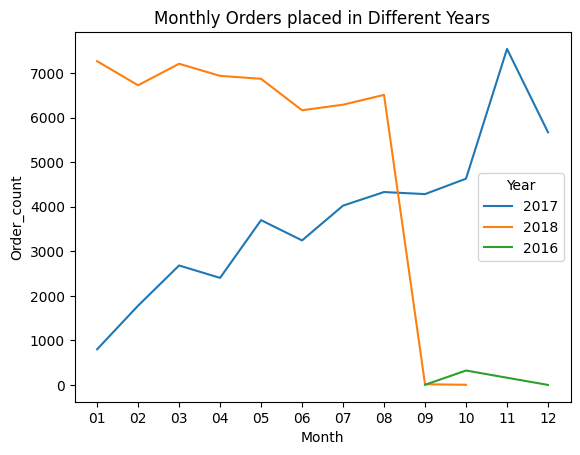

In [ ]:
season = '''SELECT
  strftime("%Y",order_purchase_timestamp) AS Year,
  strftime('%m',order_purchase_timestamp) as Month,
  COUNT(DISTINCT order_id) as Order_count
FROM orders
GROUP BY Year,Month
ORDER BY Month ASC
'''
display(pd.read_sql_query(season,connect))
plt.title("Monthly Orders placed in Different Years")
sns.lineplot(x='Month',y='Order_count',hue="Year",data=pd.read_sql_query(season,connect))

We can see some sort of upward trend, but we can not see a recurring pattern in orders placed for any specific month. It is because of less amount of data we have of understanding any kind of seasonality
****

###**What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?**


*   **Dawn - 4AM to 7AM**
* **Morning - 8AM - 11AM**
*   **Afternoon - 12PM - 5PM**
*   **Evening - 6PM - 9PM**
*   **Night - 10PM - 12AM**
*   **MidNight - 1AM - 3AM**

,Time_of_Day,Order_Count,Percentage_of_Orders
0,Afternoon,38361,38.0
1,Dawn,2127,2.0
2,Evening,24161,24.0
3,MidNight,4346,4.0
4,Morning,20507,20.0
5,Night,9939,9.0


<Axes: title={'center': 'Time of Day when orders are placed'}, xlabel='Time_of_Day', ylabel='Order_Count'>

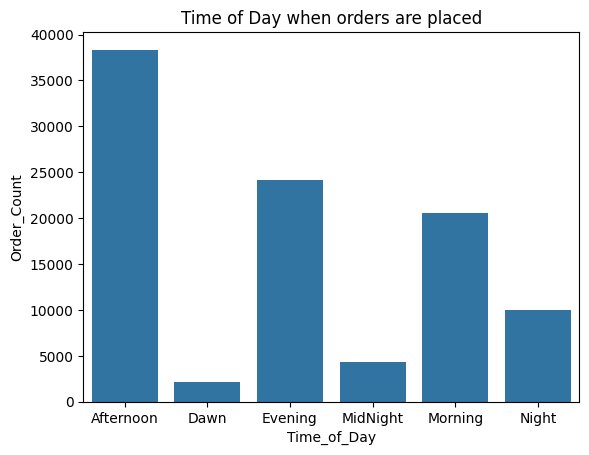

In [ ]:
time_of_day = '''
WITH time_of_day AS (
SELECT
  CASE
  WHEN strftime("%H",order_purchase_timestamp) BETWEEN "04" AND "07" THEN "Dawn"
  WHEN strftime("%H",order_purchase_timestamp) BETWEEN "08" AND "11" THEN "Morning"
  WHEN strftime("%H",order_purchase_timestamp) BETWEEN "12" AND "17" THEN "Afternoon"
  WHEN strftime("%H",order_purchase_timestamp) BETWEEN "18" AND "21" THEN "Evening"
  WHEN strftime("%H",order_purchase_timestamp) BETWEEN "22" AND "24" THEN "Night"
  ELSE "MidNight"
  END AS Time_of_Day,
  COUNT(DISTINCT order_id) AS Order_Count
FROM orders
GROUP BY Time_of_Day
ORDER BY Order_Count DESC)

SELECT Time_of_Day,Order_Count,
ROUND(Order_Count*100/(SELECT SUM(Order_Count) FROM Time_of_Day),5) AS Percentage_of_Orders
FROM time_of_day
GROUP BY Time_of_Day
'''
display(pd.read_sql_query(time_of_day,connect))
plt.title('Time of Day when orders are placed')
sns.barplot(x='Time_of_Day',y='Order_Count',data=pd.read_sql_query(time_of_day,connect))

**Majority of Orders are made in Afternoon, Evening & Morning (Consisting 82% of total orders)**
****





### **Top 10 States with Most orders**

In [ ]:
state_cust ='''SELECT g.geolocation_state AS State,
  COUNT(DISTINCT o.order_id) AS Order_count,
  ROUND(COUNT(DISTINCT o.order_id)*100.00/(SELECT COUNT(DISTINCT order_id) FROM orders),2) AS Percentage_of_Orders
  FROM orders AS o
  JOIN customers_ AS c
  ON o.customer_id = c.customer_id
  JOIN geolocation AS g
  ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
  GROUP BY g.geolocation_state
  ORDER BY Order_count DESC
  LIMIT 10
'''
pd.read_sql_query(state_cust,connect)

,State,Order_count,Percentage_of_Orders
0,SP,41731,41.97
1,RJ,12839,12.91
2,MG,11624,11.69
3,RS,5473,5.50
4,PR,5034,5.06
5,SC,3651,3.67
6,BA,3371,3.39
7,ES,2027,2.04
8,GO,2011,2.02
9,DF,1974,1.99


**State of São Paulo, State of Rio de Janeiro, State of Minas Gerais, State of Rio Grande do Sul & State of Paraná are Top 5 states in terms orders placed by customers.**
****


### **Get month on month orders based on region / state**

,geolocation_state,Month,Order_count
0,BA,01,264
1,BA,02,273
2,BA,03,338
3,BA,04,316
4,BA,05,365
...,...,...,...
115,SP,08,4982
116,SP,09,1647
117,SP,10,1907
118,SP,11,3011


<Axes: title={'center': 'State wise Monthly trend of order placed'}, xlabel='Month', ylabel='Order_count'>

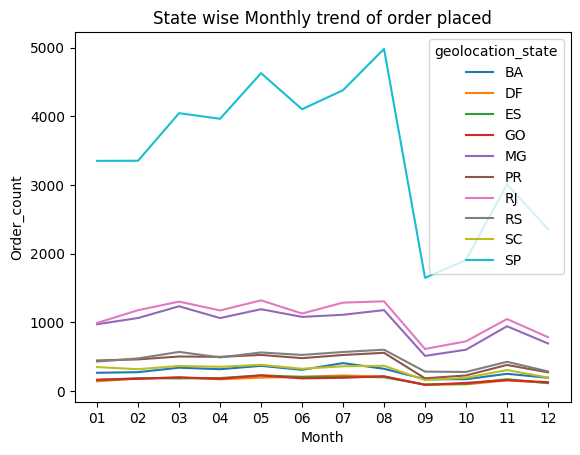

In [ ]:
mom='''SELECT g.geolocation_state,
  strftime('%m',o.order_purchase_timestamp) as Month,
  COUNT(DISTINCT o.order_id) AS Order_count
  FROM orders AS o
  JOIN customers_ AS c
  ON o.customer_id = c.customer_id
  JOIN geolocation AS g
  ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
  GROUP BY g.geolocation_state,Month
  HAVING g.geolocation_state IN ("SP","RJ","MG","RS","PR","SC","BA","ES","GO","DF")
'''
display(pd.read_sql_query(mom,connect))
plt.title("State wise Monthly trend of order placed")
sns.lineplot(x='Month',y='Order_count',hue="geolocation_state",data=pd.read_sql_query(mom,connect))

**São Paulo is the state with Most order in each month by a far margin.**

**We can clearly see sharp drop in orders in the month of September (9) & bounce back in monrh of November (11), we also oberserve 2 small spikes in the month of March & May.**
****

### **How are customer distributed in Brazil**

,geolocation_state,Customer_Count,Percentage_of_Customers
0,SP,40287,41.92
1,RJ,12372,12.87
2,MG,11248,11.70
3,RS,5284,5.50
4,PR,4871,5.07
5,SC,3547,3.69
6,BA,3268,3.40
7,ES,1959,2.04
8,GO,1944,2.02
9,DF,1913,1.99


<Axes: xlabel='geolocation_state', ylabel='Customer_Count'>

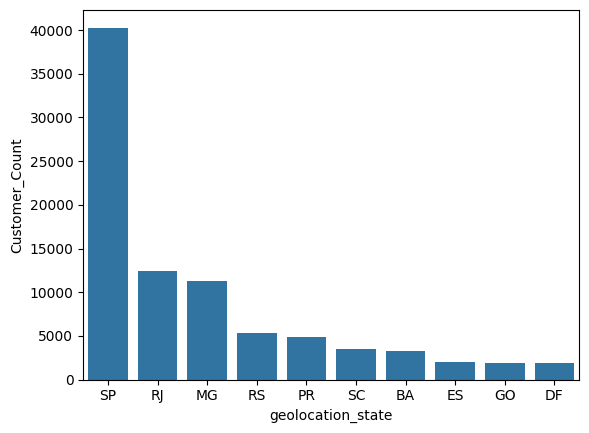

In [ ]:
demographic = '''SELECT
  g.geolocation_state,
  COUNT(DISTINCT c.customer_unique_id) as Customer_Count,
  ROUND(COUNT(DISTINCT c.customer_unique_id)*100.00/(SELECT COUNT(DISTINCT customer_unique_id) FROM customers_),2) AS Percentage_of_Customers
FROM customers_ AS c
  JOIN geolocation AS g
  ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
  GROUP BY g.geolocation_state
  ORDER BY Customer_Count DESC
  LIMIT 10
'''
display(pd.read_sql_query(demographic,connect))
sns.barplot(x='geolocation_state',y='Customer_Count',data=pd.read_sql_query(demographic,connect))

**State of São Paulo has the most 41.9% of the total customers, we also see 2/3rd (66.4%) of total customers come from top 3 states (State of São Paulo, State of Rio de Janeiro & State of Minas Gerais)**
****

### **Year wise comparison of Total orders, Total Customer, Total Prize, Total Freight, Average Order value & Average Freight.**

In [ ]:
avg_price = '''
with price_freight as (
SELECT
strftime('%Y', o.order_purchase_timestamp) as Year,
strftime('%m', o.order_purchase_timestamp) as Month,
o.order_id,o.customer_id,oi.price,oi.freight_value,c.customer_unique_id
FROM order_items AS oi
JOIN orders AS o
ON oi.order_id = o.order_id
JOIN customers_ AS c
ON o.customer_id = c.customer_id
)

SELECT Year,COUNT(DISTINCT order_id) AS Total_Orders,
COUNT(DISTINCT(customer_unique_id)) AS Unique_Customers,
ROUND(SUM(price),2) AS Total_Price,
ROUND(SUM(freight_value),2) AS Total_Freight,
ROUND(SUM(price)/COUNT(order_id),2) AS Avg_price,
ROUND(SUM(freight_value)/COUNT(order_id),2) AS Avg_freight
FROM price_freight
GROUP BY Year
ORDER BY Year ASC
'''
pd.read_sql_query(avg_price,connect)

,Year,Total_Orders,Unique_Customers,Total_Price,Total_Freight,Avg_price,Avg_freight
0,2016,312,309,49785.92,7397.29,134.56,19.99
1,2017,44579,43225,6155806.98,986865.45,121.02,19.40
2,2018,53775,52565,7386050.80,1257646.80,120.26,20.48


**We see increase in no. of Customers, orders, Price (Money spent), freight & Average fright as years passes.
But there is drop in Average price.**
****

### **Month-wise comparison of Each Year on the basis of Average order price & Average Freight.**

,Year,Month,Avg_price,Avg_freight
0,2017,01,125.98,17.67
1,2018,01,115.74,19.16
2,2017,02,126.76,19.98
3,2018,02,110.03,18.60
4,2017,03,124.78,19.23
5,2018,03,119.66,20.92
6,2017,04,134.10,19.56
7,2018,04,124.97,20.45
8,2017,05,122.36,19.37
9,2018,05,125.74,19.34


<Axes: title={'center': 'Month-wise variation of Average Freight'}, xlabel='Month', ylabel='Avg_freight'>

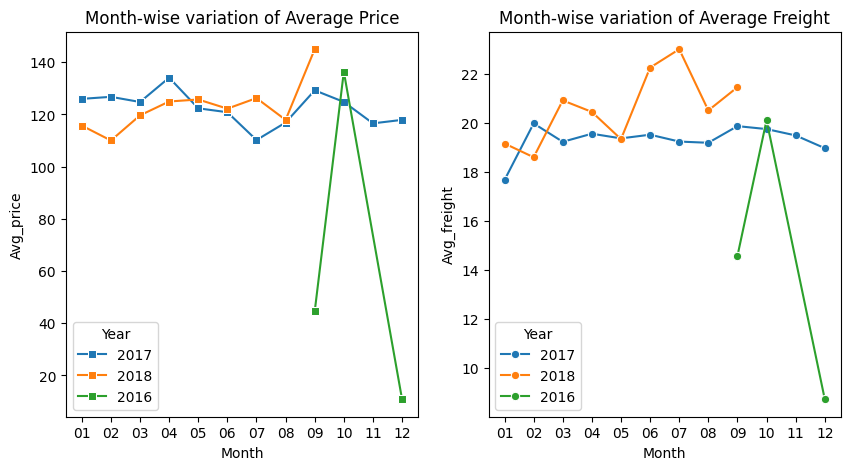

In [ ]:
avg_price_month_wise = '''
with price_freight as (
SELECT
strftime('%Y', o.order_purchase_timestamp) as Year,
strftime('%m', o.order_purchase_timestamp) as Month,
o.order_id,o.customer_id,oi.price,oi.freight_value
FROM order_items AS oi
JOIN orders AS o
ON oi.order_id = o.order_id
)

SELECT Year,Month,
ROUND(SUM(price)/COUNT(order_id),2) AS Avg_price,
ROUND(SUM(freight_value)/COUNT(order_id),2) AS Avg_freight
FROM price_freight
GROUP BY Year,Month
ORDER BY Month ASC
'''

display(pd.read_sql_query(avg_price_month_wise ,connect))
plt.figure(figsize=(10, 5))
plt.title("Monthly Average Price")
plt.subplot(1,2,1)
plt.title("Month-wise variation of Average Price")
sns.lineplot(x='Month',y='Avg_price',marker= "s",hue='Year',data=pd.read_sql_query(avg_price_month_wise ,connect))
plt.subplot(1,2,2)
plt.title("Month-wise variation of Average Freight")
sns.lineplot(x='Month',y='Avg_freight',marker= "o",hue='Year',data=pd.read_sql_query(avg_price_month_wise ,connect))


Sum and mean price by customer state

In [ ]:
Sale_and_Avg_Sale = '''
with sale_and_avg_sale as (
SELECT
c.customer_state,
o.order_id,o.customer_id,oi.price,oi.freight_value,c.customer_unique_id
FROM order_items AS oi
JOIN orders AS o
ON oi.order_id = o.order_id
JOIN customers_ AS c
ON o.customer_id = c.customer_id
)

SELECT
customer_state as Customer_State,
ROUND(SUM(price),2) AS Total_Price,
ROUND(SUM(freight_value),2) AS Total_Freight,
COUNT(DISTINCT order_id) AS Total_Orders,
COUNT(DISTINCT(customer_unique_id)) AS Unique_Customers,
ROUND(SUM(price)/COUNT(DISTINCT order_id),2) AS Avg_price,
ROUND(SUM(freight_value)/COUNT(DISTINCT order_id),2) AS Avg_freight
FROM sale_and_avg_sale
GROUP BY customer_state
ORDER BY Total_price DESC
'''
pd.read_sql_query(Sale_and_Avg_Sale,connect)

,Customer_State,Total_Price,Total_Freight,Total_Orders,Unique_Customers,Avg_price,Avg_freight
0,SP,5202955.05,718723.07,41375,39981,125.75,17.37
1,RJ,1824092.67,305589.31,12762,12303,142.93,23.95
2,MG,1585308.03,270853.46,11544,11178,137.33,23.46
3,RS,750304.02,135522.74,5432,5249,138.13,24.95
4,PR,683083.76,117851.68,4998,4840,136.67,23.58
5,SC,520553.34,89660.26,3612,3513,144.12,24.82
6,BA,511349.99,100156.68,3358,3257,152.28,29.83
7,DF,302603.94,50625.50,2125,2062,142.40,23.82
8,GO,294591.95,53114.98,2007,1942,146.78,26.46
9,ES,275037.31,49764.60,2025,1956,135.82,24.58




### **Top 5 states where delivery is really fast/ not so fast compared to estimated date**

In [ ]:
order_time = '''
SELECT customer_state,
ROUND(AVG(CAST(strftime('%J', order_delivered_customer_date) AS REAL) - CAST(strftime('%J', order_purchase_timestamp) AS REAL)),0)  AS Avg_Delivery_time_In_Days,
ROUND(AVG(CAST(strftime('%J', order_delivered_customer_date) AS REAL) - CAST(strftime('%J', order_estimated_delivery_date) AS REAL)),0) AS Avg_Difference_Estimated_Actual_time_In_days
FROM orders
JOIN customers_ AS c
ON orders.customer_id = c.customer_id
WHERE order_status = 'delivered'
GROUP BY customer_state
ORDER BY Avg_Difference_Estimated_Actual_time_In_days asc
'''
pd.read_sql_query(order_time,connect)


,customer_state,Avg_Delivery_time_In_Days,Avg_Difference_Estimated_Actual_time_In_days
0,AC,21.0,-20.0
1,AM,26.0,-19.0
2,AP,27.0,-19.0
3,RO,19.0,-19.0
4,RR,29.0,-17.0
5,MT,18.0,-14.0
6,MG,12.0,-13.0
7,PA,24.0,-13.0
8,PB,20.0,-13.0
9,PE,18.0,-13.0


### **Analysing orders on the basis of Custemer's state & Seller's state**



In [ ]:
order_state = '''
WITH order_state AS (
SELECT
c.customer_state,
c.customer_id,
o.order_id,
s.seller_state,
CASE WHEN c.customer_state = s.seller_state THEN 'Same State' ELSE 'Inter State' END AS Order_Type,
c.customer_state || " - " ||s.seller_state AS Order_State
FROM orders AS o
JOIN customers_ AS c
ON o.customer_id = c.customer_id
JOIN order_items AS oi
ON o.order_id = oi.order_id
JOIN sellers AS s
ON oi.seller_id = s.seller_id
)

SELECT
Order_Type,
COUNT(DISTINCT order_id) AS Order_Count,
ROUND(COUNT(DISTINCT order_id)*100.0/(SELECT COUNT(DISTINCT order_id) FROM order_state),2) AS Percentage_of_Orders
FROM order_state
GROUP BY Order_Type
'''
pd.read_sql_query(order_state,connect)

,Order_Type,Order_Count,Percentage_of_Orders
0,Inter State,63313,64.17
1,Same State,35600,36.08


**Categorising order interms of order between same state & different state give us an idea about the movement of products.**

**Out of total 64% of orders were Inter-state (Sellers & Customers are not from same state) & 36% of orders were between same state.**
****

### **Top 10 Customer - Seller State based on the no. of Orders**

In [ ]:
order_states = '''
WITH order_state AS (
SELECT
c.customer_state,
c.customer_id,
o.order_id,
s.seller_state,
CASE WHEN c.customer_state = s.seller_state THEN 'Same State' ELSE 'Inter State' END AS Order_Type,
c.customer_state || " - " ||s.seller_state AS Order_State
FROM orders AS o
JOIN customers_ AS c
ON o.customer_id = c.customer_id
JOIN order_items AS oi
ON o.order_id = oi.order_id
JOIN sellers AS s
ON oi.seller_id = s.seller_id
)

SELECT
Order_State AS Customer_Seller_state,
COUNT(DISTINCT order_id) AS Orders,
ROUND(COUNT(DISTINCT order_id)*100.0/(SELECT COUNT(DISTINCT order_id) FROM order_state),2) AS Percentage_of_Orders
FROM order_state
GROUP BY Order_State
ORDER BY Orders DESC
limit 10
'''
pd.read_sql_query(order_states,connect)

,Customer_Seller_state,Orders,Percentage_of_Orders
0,SP - SP,31502,31.93
1,RJ - SP,8457,8.57
2,MG - SP,7591,7.69
3,RS - SP,3668,3.72
4,PR - SP,3177,3.22
5,SP - PR,3019,3.06
6,SP - MG,2633,2.67
7,BA - SP,2387,2.42
8,SC - SP,2370,2.40
9,MG - MG,1572,1.59


**Out of Total orders placed 31% of orders were in same state "State of São Paulo (Customer) to State of São Paulo (Seller)"**
****

### **Top 10 product category in term of no. of orders**

In [ ]:
products_sell = '''
SELECT
p.product_category,
COUNT( DISTINCT o.order_id) AS Order_Count,
SUM(oi.price) AS Total_Price,
ROUND(AVG(p.product_length_cm*p.product_height_cm*p.product_width_cm),2) AS Avg_Volume,
ROUND(AVG(oi.freight_value),2) AS Avg_Freight,
ROUND(COUNT(DISTINCT o.order_id)*100.00/(SELECT COUNT(DISTINCT order_id) FROM orders),2) AS Percentage_of_Orders
FROM orders AS o
JOIN order_items AS oi
ON o.order_id = oi.order_id
JOIN products AS p
ON oi.product_id = p.product_id
GROUP BY p.product_category
ORDER BY Percentage_of_Orders DESC
LIMIT 10
'''
pd.read_sql_query(products_sell,connect)

,product_category,Order_Count,Total_Price,Avg_Volume,Avg_Freight,Percentage_of_Orders
0,bed table bath,9417,1036988.68,16619.93,18.42,9.47
1,HEALTH BEAUTY,8836,1258681.34,8261.15,18.88,8.89
2,sport leisure,7720,988048.97,13579.37,19.51,7.76
3,computer accessories,6689,911954.32,5539.61,18.82,6.73
4,Furniture Decoration,6449,729762.49,19596.28,20.73,6.49
5,housewares,5884,632248.66,22737.48,20.99,5.92
6,Watches present,5624,1205005.68,2850.28,16.78,5.66
7,telephony,4199,323667.53,1785.06,15.67,4.22
8,automotive,3897,592720.11,18074.92,21.88,3.92
9,toys,3886,483946.60,18988.80,18.81,3.91


**Top 3 Product Category contribute 26% in total orders placed. (Top 3 Categories are Bed table bath, Health Beauty & Sport Leisure)**
****

In [ ]:
products_sell = '''
SELECT
p.product_category,
COUNT( DISTINCT o.order_id) AS Order_Count,
ROUND(AVG(p.product_length_cm*p.product_height_cm*p.product_width_cm),2) AS Avg_Volume,
ROUND(AVG(oi.freight_value),2) AS Avg_Freight
FROM orders AS o
JOIN order_items AS oi
ON o.order_id = oi.order_id
JOIN products AS p
ON oi.product_id = p.product_id
GROUP BY p.product_category
ORDER BY Order_Count DESC
'''
pd.read_sql_query(products_sell,connect)

,product_category,Order_Count,Avg_Volume,Avg_Freight
0,bed table bath,9417,16619.93,18.42
1,HEALTH BEAUTY,8836,8261.15,18.88
2,sport leisure,7720,13579.37,19.51
3,computer accessories,6689,5539.61,18.82
4,Furniture Decoration,6449,19596.28,20.73
...,...,...,...,...
69,La Cuisine,13,28224.93,23.83
70,cds music dvds,12,13125.00,16.07
71,PC Gamer,8,6354.67,14.84
72,Fashion Children's Clothing,8,7267.88,11.94


### **TOP 10 states based on Count of Reviews & Rating**

In [ ]:
reviews = '''
SELECT
c.customer_state,COUNT(r.review_score) AS Review_Count,
ROUND(AVG(r.review_score),2) AS Avg_Review_Score
FROM orders AS o
JOIN customers_ AS c
ON o.customer_id = c.customer_id
JOIN order_reviews AS r
ON o.order_id = r.order_id
WHERE order_status = 'delivered'
GROUP BY c.customer_state
ORDER BY Review_Count DESC,Avg_Review_Score
LIMIT 10
'''

display(pd.read_sql_query(reviews,connect))

,customer_state,Review_Count,Avg_Review_Score
0,SP,40484,4.25
1,RJ,12281,3.96
2,MG,11354,4.19
3,RS,5364,4.19
4,PR,4919,4.24
5,SC,3533,4.13
6,BA,3246,3.93
7,DF,2089,4.13
8,ES,1978,4.08
9,GO,1963,4.10


### **Numbers of Orders based on different order Types**




In [ ]:
Payment_orders = '''
SELECT payment_type,COUNT(order_id) as Order_Count,
ROUND(COUNT(DISTINCT order_id)*100.0/(SELECT COUNT(DISTINCT order_id) FROM payments),2) as Percentage_of_Orders
FROM payments
GROUP BY payment_type
ORDER BY Order_Count DESC
'''
pd.read_sql_query(Payment_orders,connect)

,payment_type,Order_Count,Percentage_of_Orders
0,credit_card,76795,76.94
1,UPI,19784,19.90
2,voucher,5775,3.89
3,debit_card,1529,1.54
4,not_defined,3,0.00


**Credit card being the preferred way of payment with 76.9% of orders, UPI at 2nd with  19% of orders.
Interesting to see that Debit cards was prefered in only 1.5% of orders.**
****

## **Distribution of payment installments and count of orders**



,Installments,Order_Count,Percentage_of_Orders
0,1,52546,50.580
1,2,12413,11.949
2,3,10461,10.070
3,4,7098,6.832
4,10,5328,5.129
5,5,5239,5.043
6,8,4268,4.108
7,6,3920,3.773
8,7,1626,1.565
9,9,644,0.620


<Axes: xlabel='Installments', ylabel='Order_Count'>

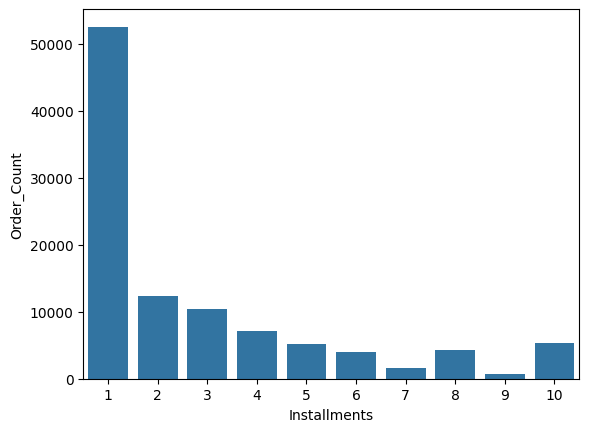

In [ ]:
installment = '''
SELECT
payment_installments AS Installments,
COUNT(order_id) as Order_Count,
ROUND(COUNT(order_id)*100.00/(SELECT COUNT(order_id) FROM payments),3) as Percentage_of_Orders
FROM payments
GROUP BY payment_installments
ORDER BY Order_Count DESC
LIMIT 10
'''
display(pd.read_sql_query(installment,connect))
sns.barplot(x='Installments',y='Order_Count',data=pd.read_sql_query(installment,connect))

**Half of the orders were placed on 1st installment & 72% of orders were placed with less than 4 intallments**
****